<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Berlín Isabel Preciado Escalera 

**Fecha:**

**Expediente** :if723259 

**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/berlinpreciado21/ProyectoConjunto_BIPreciado_AFlores

# Tarea 6
    


Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.


In [9]:
import matplotlib.pyplot as plt
from scipy import optimize 
import numpy as np

>Para realizar este inciso es necesario primero conocer el máxio de f(x) que lo hacemos con la función de optimize de scipy y posteriomente realizar la gráfica y comprobar que t(x) es mayor que f(x). En caso de que t(x) no fuera mayor a f(x) sería necesario buscar otra función de t(x) para cumplir con la condición del método

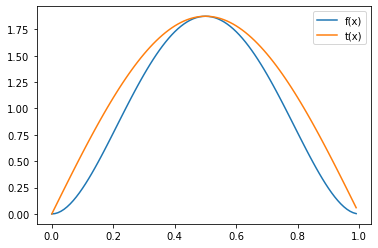

In [22]:
f = lambda x:30*(x**2-2*x**3+x**4)
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))

t= lambda x: max_f*np.sin(np.pi*x)

x = np.arange(0,1,0.01)

plt.plot(x, f(x), label='f(x)')
plt.plot(x, t(x), label='t(x)')
plt.legend(loc="best")
plt.show()

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

Para encontrar la función de densidad g(x) recurrimos a las integrales por lo que se integra la función $t(x)$ que es $a \sin(\pi x)$ para conocer c:
> Integral:
$$\int_{0}^{1} t(x) dx = \int_{0}^{1} a \sin(\pi x) dx$$
> $a$ se toma como constante:
$$a \int_{0}^{1}  \sin(\pi x) dx$$
> ahora se aplica integración por sustitución siendo $u = \pi x$
> Entonces:
$$\frac{a}{\pi} \int_{0}^{\pi}  \sin(u) du$$
> Lo cual da como resultado: $$\frac{a}{\pi} [-\cos(u)]_{0}^{\pi}$$
$$ c= \frac{2a}{\pi} $$
> Por lo que para conocer g(x) sólo se divide $t(x)$ entre $c$:
$$\frac{t(x)}{c} = \frac{a \sin(\pi x)}{\frac{2a}{\pi}} = \frac{\pi \sin(\pi x)}{2}$$
<span style="color:red"> Por lo que: $$g(x) = \frac{\pi \sin(\pi x)}{2}$$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

>Se requiere encontrar la función de distribución acumuladas: $G(x)$
>Conviene aplicar el método de sustitución: 
>Definimos: $u = \pi x$ y $du = \pi dx$, o sea que $dx = \frac{du}{\pi}$
$$G(x) = \int_{0}^{x}g(x) = \int_{0}^{x} \frac{\pi}{2} \sin(\pi x) dx$$
$$\frac{\pi}{2} \int_{0}^{x} \sin(u) \frac{du}{\pi}=  \frac{1}{2} \int_{0}^{x} \sin(u) du $$
$$ \frac{1}{2} \int_{0}^{x} \sin(u) du=\frac{1}{2} [-\cos(u)]_{0}^{x}$$ $$ \frac{1}{2} [-\cos(\pi x)]_{0}^{x}
=\frac{1}{2} [-\cos(x \pi) + \cos(0 \cdot \pi)]$$ $$ \frac{1}{2} [-\cos(x \pi) + \cos(0)] = \frac{1}{2} [-\cos(x \pi) + 1]= -\frac{1}{2} \cos(x \pi) + \frac{1}{2}$$
>Finalmente, tenemos que: $$G(x)=-\frac{1}{2} \cos(x \pi) + \frac{1}{2}$$
Después de conocer cuál es la $G(x)$ se debe calcular la función inversa para obtener la función de distribución que sigue $g(x)$
$$ G(x) = -\frac{1}{2} \cos(x \pi) + \frac{1}{2} $$
$$U = \frac{- \cos(x \pi) + 1}{2}$$
$$ \cos(x \pi) = -2U + 1 $$
$$ x \pi = \cos^{-1}(1 - 2U) $$
<span style="color:red"> $$ x = \frac{\cos^{-1}(1 - 2U)}{\pi}$$


4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)

In [12]:
def comparar_aleatorias_densidad_2(f, Finv, N):
    U = np.random.uniform(0, 1, N)
    f_rand = Finv(U)
    x_new = np.arange(0, 1, 0.01)
    
    f_densidad = f(x)
    plt.hist(f_rand, bins=30, density=True)
    plt.plot(x_new, f_densidad)
    plt.show()

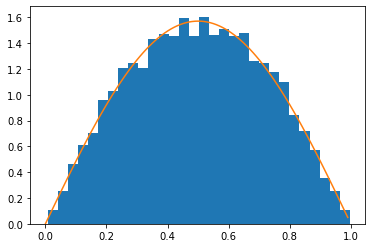

In [13]:

g = lambda x: (np.pi/2)*np.sin(np.pi*x)
G_inv = lambda U: (1/np.pi)*np.arccos(-2*U+1)
N = 10000

#plt.plot(x_new, g(x_new), label='g(x)')  #En vez de este plot, usamos la funcion ya creada de comparar_aleatorias
comparar_aleatorias_densidad_2(g, G_inv, N)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![imagen.png](attachment:imagen.png)

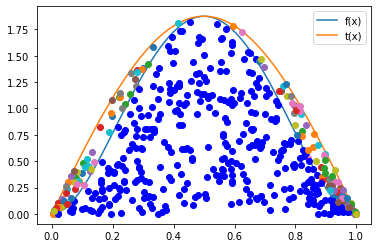

In [19]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    '''Esta función nos regresa una gráfica donde se muestran los puntos acetpados y los puntos rechazados del 
    metodo de acepatación y rechazo'''

    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    return 

N=500 #número de puntos
R2=np.random.rand(N)
R1=np.random.rand(N)

plt.plot(x, f(x), label='f(x)')
plt.plot(x, t(x), label='t(x)')
plt.legend(loc="best")


Acep_rechazo(R2,R1,f,t)#aplicamos método

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

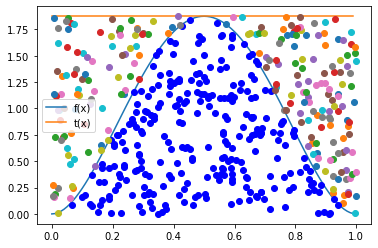

In [23]:
t_cons = lambda x: max_f*np.ones(len(x))#usamos max_f para hacer t(x) constante

plt.plot(x, f(x), label='f(x)')
plt.plot(x, t_cons(x), label='t(x)')
plt.legend(loc="best")



Acep_rechazo(R2,R1,f, t_cons)

In [24]:
def conteo_Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    '''Esta función nos regresa el vector de puntos aceptados del método de acpetación y rechazo'''

    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
  
    aceptados = [R1[i] for i in range(len(R1)) if condition[i]]
    return aceptados

cont_t_var=len(conteo_Acep_rechazo(R2,R1,f, t))/N
cont_t_cons=len(conteo_Acep_rechazo(R2,R1,f, t_cons))/N

print("El porcentaje de puntos aceptados usando t(x) variable es de: ", cont_t_var*100, "% \n")
print("El porcentaje de puntos aceptados usando t(x) constante es de: ", cont_t_cons*100, "% \n")

El porcentaje de puntos aceptados usando t(x) variable es de:  69.19999999999999 % 

El porcentaje de puntos aceptados usando t(x) constante es de:  54.6 % 



7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

In [25]:
x = np.arange(0,1,0.01)
# Función objetivo 
f = lambda x:20*x*(1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = max_f # función constante


def v_a_Acep_rechazo(f:'función objetivo a generar',
                        t:'función que mayora a f',
                        N: 'Variables aleatorioas a genrar'):
    '''Esta función nos regresa N variables aleatorias por medio del método de aceptación y rechazo'''
    aceptados=[x for x in range(N)] #generar vector de puntos
    def llenar(i):
        nonlocal f, t, aceptados
        aleatorio_1=np.random.rand() #generar valor aleatori
        aleatorio_2=np.random.rand() #generar valor aleatorio
        f_x = f(aleatorio_1) #evaluar valor aleatorio en la pdf
        t_x = t #se queda así porque es constante
        condition = aleatorio_2*t_x <=f_x #validar condición 
        while condition==False: #repetir si la condición es falsa
            aleatorio_1=np.random.rand()
            aleatorio_2=np.random.rand()
            f_x = f(aleatorio_1)
            t_x = t
            condition = aleatorio_2*t_x <=f_x 
            
        aceptados[i] = aleatorio_1 #añadir cuando la condición se haga verdadera
    [llenar(i) for i in range(N)]
    return aceptados

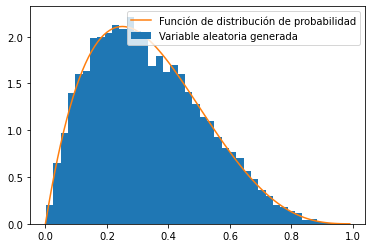

In [26]:
v_a_generada=v_a_Acep_rechazo(f,t,10000)
plt.hist(v_a_generada, density=True, bins=40, label="Variable aleatoria generada")
plt.plot(x, f(x), label="Función de distribución de probabilidad")
plt.legend()
plt.show()

In [27]:
print(f'En este caso la variable aleatoria genera una distribución tal que contempla los siguientes valores(muestra): {v_a_generada[:10]}')

En este caso la variable aleatoria genera una distribución tal que contempla los siguientes valores(muestra): [0.24657980679621117, 0.5354069777841126, 0.16337994778804543, 0.4562477065911371, 0.4467171087939391, 0.13072936136639068, 0.49797652763793576, 0.3719787331281851, 0.40971888865204875, 0.2535559530248236]


8. Demostrar la validez de la siguiente ecuación
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$$

> Se sabe que:
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$
> por lo que despejando:
$$\frac{p_{i+1}}{p_i}=\frac{n-i}{i+1}\frac{p}{1-p} $$
> Y por propieddes factoriales puedo sustituir:
$$\frac{(n+1)!}{n!}=n+1 ; \frac{n!}{(n+1)!}=\frac{1}{n+1}$$
> y:
$$ (n-1)! = \frac{n!}{n} ; n!=n(1+n)!$$
> Y tomando en cuenta que:
>$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Entonces simplificando obtenemos::
$$\frac{p_{i+1}}{p_i} = \frac{p(n-i)!(-p+i)(i+1)^{n+1-i}}{(i+1)(n+1-i)(-p+1)^{n-i}}$$
$$p_{i+1} = \frac{p(n-i)!(-p+i)(i+1)^{n+1-i}}{(i+1)(n+1-i)(-p+1)^{n-i}}p_i$$
<font color ='red'>$$p_{i+1} = \frac{n-i}{i+1}\frac{p}{1-p}p_i$$
>La ventaja de que sea recursiva es que es menos compleja porque nos ahorraríamos toda la parte de los factoriales por lo cual es más fácil de programar y necesita menos memoria computacional.
    



9. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    

Demuestre matemáticamente que 
 $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
 y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.